In [1]:
import numpy as np
import pandas as pd 
import yfinance as yf
import matplotlib.pyplot as plt

In [3]:
tickers = ['PG', 'MSFT', 'AAPL', 'GE']
mydata = pd.DataFrame()
for t in tickers :
    mydata[t] = yf.download(t,  start = '1995-1-1')['Adj Close']
    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7197 entries, 1995-01-03 to 2023-08-03
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      7197 non-null   float64
 1   MSFT    7197 non-null   float64
 2   AAPL    7197 non-null   float64
 3   GE      7197 non-null   float64
dtypes: float64(4)
memory usage: 281.1 KB


In [5]:
mydata.head()

,PG,MSFT,AAPL,GE
Date,,,,
1995-01-03,7.674555,2.341810,0.287932,25.512770
1995-01-04,7.613032,2.358833,0.295436,25.512770
1995-01-05,7.505375,2.319925,0.291684,25.575310
1995-01-06,7.520758,2.358833,0.315131,25.450239
1995-01-09,7.489993,2.344242,0.309152,25.200113


In [6]:
mydata.tail()

,PG,MSFT,AAPL,GE
Date,,,,
2023-07-28,156.410004,338.369995,195.830002,114.389999
2023-07-31,156.300003,335.920013,196.449997,114.239998
2023-08-01,156.250000,336.339996,195.610001,113.220001
2023-08-02,156.589996,327.500000,192.580002,111.970001
2023-08-03,157.000000,326.660004,191.169998,112.360001


<h1>Normalization to 100:<h1>
$\dfrac{P_{t}}{P_{0}} * 100$

In [7]:
mydata.iloc[0]

PG       7.674555
MSFT     2.341810
AAPL     0.287932
GE      25.512770
Name: 1995-01-03 00:00:00, dtype: float64

In [8]:
mydata.loc['1995-01-03']

PG       7.674555
MSFT     2.341810
AAPL     0.287932
GE      25.512770
Name: 1995-01-03 00:00:00, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

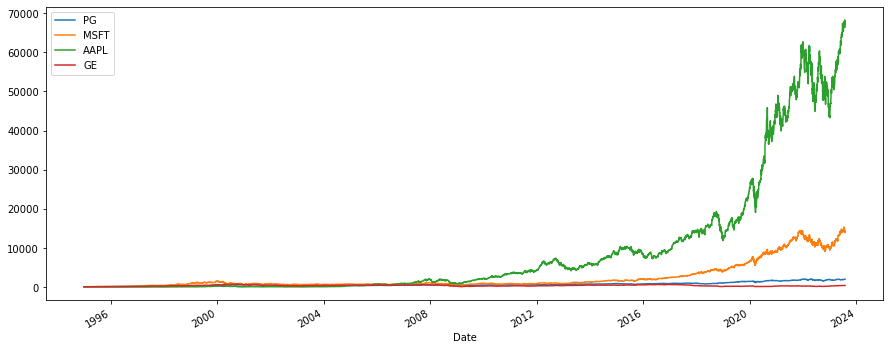

In [9]:
(mydata/ mydata.iloc[0] * 100).plot(figsize = (15, 6));
plt.show

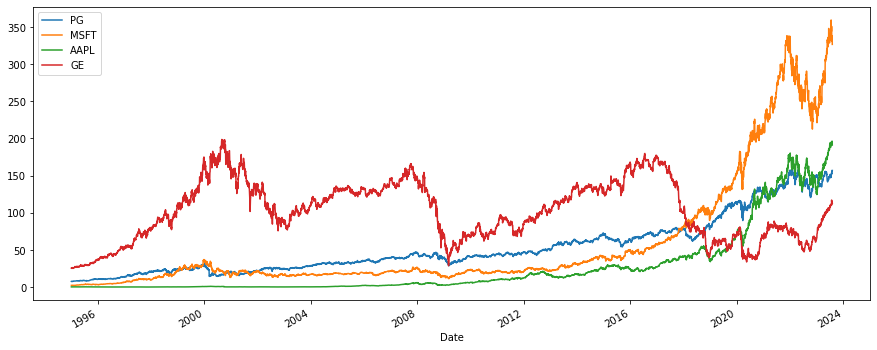

In [10]:
mydata.plot(figsize = (15,6))
plt.show()

<h1>Calculating the Return of a Portfolio of Securities:<h1>

In [11]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,PG,MSFT,AAPL,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026060,0.000000
1995-01-05,-0.014141,-0.016495,-0.012700,0.002451
1995-01-06,0.002050,0.016771,0.080386,-0.004890
1995-01-09,-0.004091,-0.006186,-0.018973,-0.009828


In [12]:
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [13]:
np.dot(returns, weights)

array([        nan,  0.00632802, -0.01022111, ..., -0.00306852,
       -0.01265935, -0.00094628])

In [14]:
annual_returns = returns.mean() * 250
print(annual_returns)

PG      0.129602
MSFT    0.220790
AAPL    0.319389
GE      0.102741
dtype: float64


In [15]:
np.dot(annual_returns, weights)

0.19313056942175244

In [16]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 4)* 100) + '%'
print(pfolio_1)

19.31%


In [17]:
weight_2 = np.array([0.4,0.4,0.15,0.05])

In [18]:
pfolio_2 = str(round(np.dot(annual_returns, weight_2), 5)* 100)+ '%'
print(pfolio_1)
print(pfolio_2)

19.31%
19.32%
